In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. load your zillow dataset

In [3]:
train, validate, test = pd.read_csv('train.csv', index_col=0), pd.read_csv('validate.csv', index_col=0), pd.read_csv('test.csv', index_col=0)


# 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft

In [4]:
train.head(2)

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0


In [4]:
baseline=train.tax_value.mean()
baseline

327962.9287565727

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
#create the model object
lm=LinearRegression()

#fit the model to my train data
lm.fit(train[['area']],train.tax_value)

#make prediction and when it does put it out in a numpy array save into a df
train['yhat'] = lm.predict(train[['area']])

# 3. Plot the residuals for the linear regression model that you made.

In [7]:
# calculating the residual (diference) between predictions actual values
train['residual']=train.tax_value - train.yhat

In [8]:
train.head(2)

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,yhat,residual
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0,314131.125460,-65891.125460
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0,345309.674341,-256919.674341


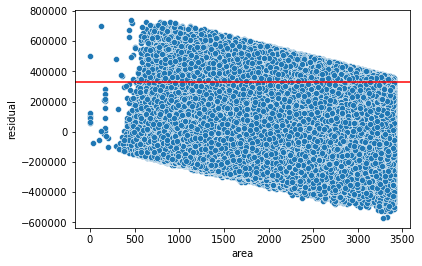

In [9]:
sns.scatterplot(data=train,x='area',y='residual')
plt.axhline(baseline,color='red')

In [10]:
train['baseline']= baseline

In [11]:
train['baseline_residual']= train.tax_value-train.baseline

# 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model

In [12]:
train['baseline_residual_2']= train.baseline_residual**2
train['residual_2']=train.residual**2

In [14]:
train.head(2)

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,yhat,residual,baseline,baseline_residual,baseline_residual_2,residual_2
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0,314131.125460,-65891.125460,327962.928757,-79722.928757,6.355745e+09,4.341640e+09
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0,345309.674341,-256919.674341,327962.928757,-239572.928757,5.739519e+10,6.600772e+10


In [15]:
#calculating sum of squared errors (SSE) by adding up that column
SSE_baseline=train.baseline_residual_2.sum()

#Doing the same thing for the predicted values
SSE=train.residual_2.sum()

In [16]:
#comparing the baseline sume of squared errors to the predicted value sum of squared errors
#we want the minimal SSE value which is the linear regression model i built
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))
print('SSE =', "{:.1f}".format(SSE))

SSE Baseline = 41138637916742832.0
SSE = 33777310861904692.0


In [18]:
# to calculate the Mean of squared errors divide by the number of occurances/points aka the length
MSE_baseline=SSE_baseline/len(train)

MSE=SSE/len(train)

print(MSE_baseline, MSE)

39596016702.04775 32510725506.882072


In [19]:
# calculating the root mean squared error (RMSE) I simply get the sqaure root of the mean of squared errors

RMSE_baseline=MSE_baseline**.5

RMSE=MSE**.5

print(RMSE_baseline,RMSE)

198987.47875695032 180307.30852320456


In [ ]:
# calculating 